# 이미지 변형-흐림

- 이미지 커널 : https://setosa.io/ev/image-kernels/

## 흐림 효과(Blur) 
- 블러링(Blurring) 또는 스무딩(Smoothing)이라 불림
- 영상이나 이미지를 번지게 하며, 해당 픽셀의 주변 값들과 비교하고 계산해서 픽셀들의 색상을 재조정함

- 단순히 이미지를 흐리게 만드는 것뿐만 아니라 노이즈를 제거해서 연산 시 계산을 빠르고 정확하게 수행하는 데 도움을 줌.
- 노이즈를 줄이거나 외부 영향을 최소화하는 데 사용
- 의도적으로 이미지를 흐리게 하는 이유는 보이는 정보를 조정함으로써 외곽선 정보를 보다 단순하게 처리함.

<img src='../cv_images/blur.png'>

**cv2.blur()**
   - 이것은 단순 평균 블러링을 수행합니다.
   - 지정된 커널 크기 내의 모든 픽셀 값의 평균을 계산하여 이미지를 흐리게 만듭니다.
   - 결과적으로 동일한 가중치로 주변 픽셀의 값을 평균화합니다.

`dst = cv2.blur(src, ksize, anchor, borderType)` :입력 이미지(src)를 커널 크기(ksize), 고정점(anchor), 테두리 외삽법(borderType)으로 흐림 효과를 적용한 결과 이미지(dst)를 반환
- ksize : 커널(kernel) 크기-이미지에서 (x, y)의 픽셀과 설정한 크기의 사각형 커널이며 커널 크기가 클수록 더 흐려짐
- anchor :(-1, -1) 커널의 중심을 의미함, 기본값: 커널 내에서의 앵커 포인트(커널을 이미지에 적용할 때 기준이 되는 특정 픽셀 위치)
- borderType : 테두리 외삽법(Border Extrapolation) - 컨벌루션을 적용할 때, 이미지 가장자리 부분의 처리 방식
    - borderType=cv2.BORDER_DEFAULT : 기본 테두리 유형 사용
    

In [1]:
import cv2

img_file = '../cv_images/img.jpg'
img = cv2.imread(img_file)

# 커널 크기 (9, 9)로 블러 처리, (-1, -1)은 커널의 중심을 앵커 포인트로 사용
dst = cv2.blur(img, (9,9), anchor=(-1,-1), borderType=cv2.BORDER_DEFAULT)  # 코드입력

cv2.imshow("img", img)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

## 가우시안 블러

`blurred_image = cv2.GaussianBlur(source_image, (kernel_width, kernel_height), sigmaX, sigmaY)`
- 이미지를 흐리게 하면서도 노이즈도 제거함. 이렇게 하면 이미지 연산할때 보다 빠르게 정확하게 처리할 수 있음 = > 노이즈 제거, 이미지 부드럽게 처리, 엣지 검출을 위한 사전 처리 단계 등 다양한 목적으로 활용

   - 가우시안 함수를 기반으로 한 가중치를 사용하여 블러링을 수행합니다.
   - 커널의 중심에 가까운 픽셀은 더 높은 가중치를 가지며, 멀리 떨어진 픽셀은 더 낮은 가중치를 가집니다.
   - 커널의 크기는 블러링의 정도를 결정 
       - 큰 커널은 이미지를 더 흐리게 만들며, 
       - 작은 커널은 덜 흐리게 만듬
   - sigmaX : 가우시안 블러에서 X 방향의 표준 편차는 블러의 정도와 연관이 있음
        - 큰 표준 편차는 이미지를 더 흐리게 만들며, 
        - 작은 표준 편차는 덜 흐리게 만듬
   - sigmaY	: Y 방향(세로) 가우시안 커널 표준편차 (기본값은 0)

### 커널 크기에 따른 블러 효과

In [4]:
import cv2

img_file = '../cv_images/img.jpg'

img = cv2.imread(img_file)

# 커널사이즈 : 양수에 홀수 - (3, 3), (5, 5), (7, 7)이런 사이즈에 우수한 성능을 보여줌
kernel_3 = cv2.GaussianBlur(img, (3,3), 0) # (3,3) : 커널사이즈, 0: 커널의 표준편차 - 자동계산
kernel_5 = cv2.GaussianBlur(img, (5,5), 0) # 코드 입력 # (5,5) : 커널사이즈
kernel_7 = cv2.GaussianBlur(img, (7,7), 0) # (7,7) : 커널사이즈

cv2.imshow('img', img)
cv2.imshow('kernel_3', kernel_3)
cv2.imshow('kernel_5', kernel_5)
cv2.imshow('kernel_7', kernel_7)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 표준 편차 변화에 따른 블러효과 - 커널 사이즈 변경보다 더 흐린 효과가 큼

In [5]:
import cv2
img_file = '../cv_images/img.jpg'

img = cv2.imread(img_file)

# 커널값을 (0, 0)으로 하면 sigmaX 에 의해 정해짐
sigma_1 = cv2.GaussianBlur(img, (0,0), 1) # 1: sigmaX - 가우시안 커널의 x 방향의 표준편차
sigma_2 = cv2.GaussianBlur(img, (0,0), 2)   # 코드입력 # 2: sigmaX - 가우시안 커널의 x 방향의 표준편차
sigma_3 = cv2.GaussianBlur(img, (0,0), 3) # 3: sigmaX - 가우시안 커널의 x 방향의 표준편차

cv2.imshow('img', img)
cv2.imshow('sigma_1', sigma_1)
cv2.imshow('sigma_2', sigma_2)
cv2.imshow('sigma_3', sigma_3)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **cv2.blur() vs cv2.GaussianBlur() vs cv2.medianBlur()**
- `cv2.blur()`평균블러링링: 단순히 주변 픽셀 평균 계산- 더 단순하고 빠르게 이미지를 흐리게 만들 수 있습니다. 특정 애플리케이션에서는 이것이 더 적합할 수 있음
- `cv2.GaussianBlur()`:가중 평균 (중앙 픽셀에 더 많은 가중치) - 이미지의 노이즈를 줄이는 데 특히 효과적입니다. 가우시안 블러는 노이즈 제거와 동시에 이미지의 경계를 부드럽게 만들어 주기 때문에 많은 컴퓨터 비전 작업에서 선호됨.
- `cv2.medianBlur()`: 미디언 블러링 (cv2.medianBlur) - 주변 픽셀의 중앙값을 사용, 노이즈 제거에 최고(특히 소금-후추 노이즈 제거 효과 뛰어남)


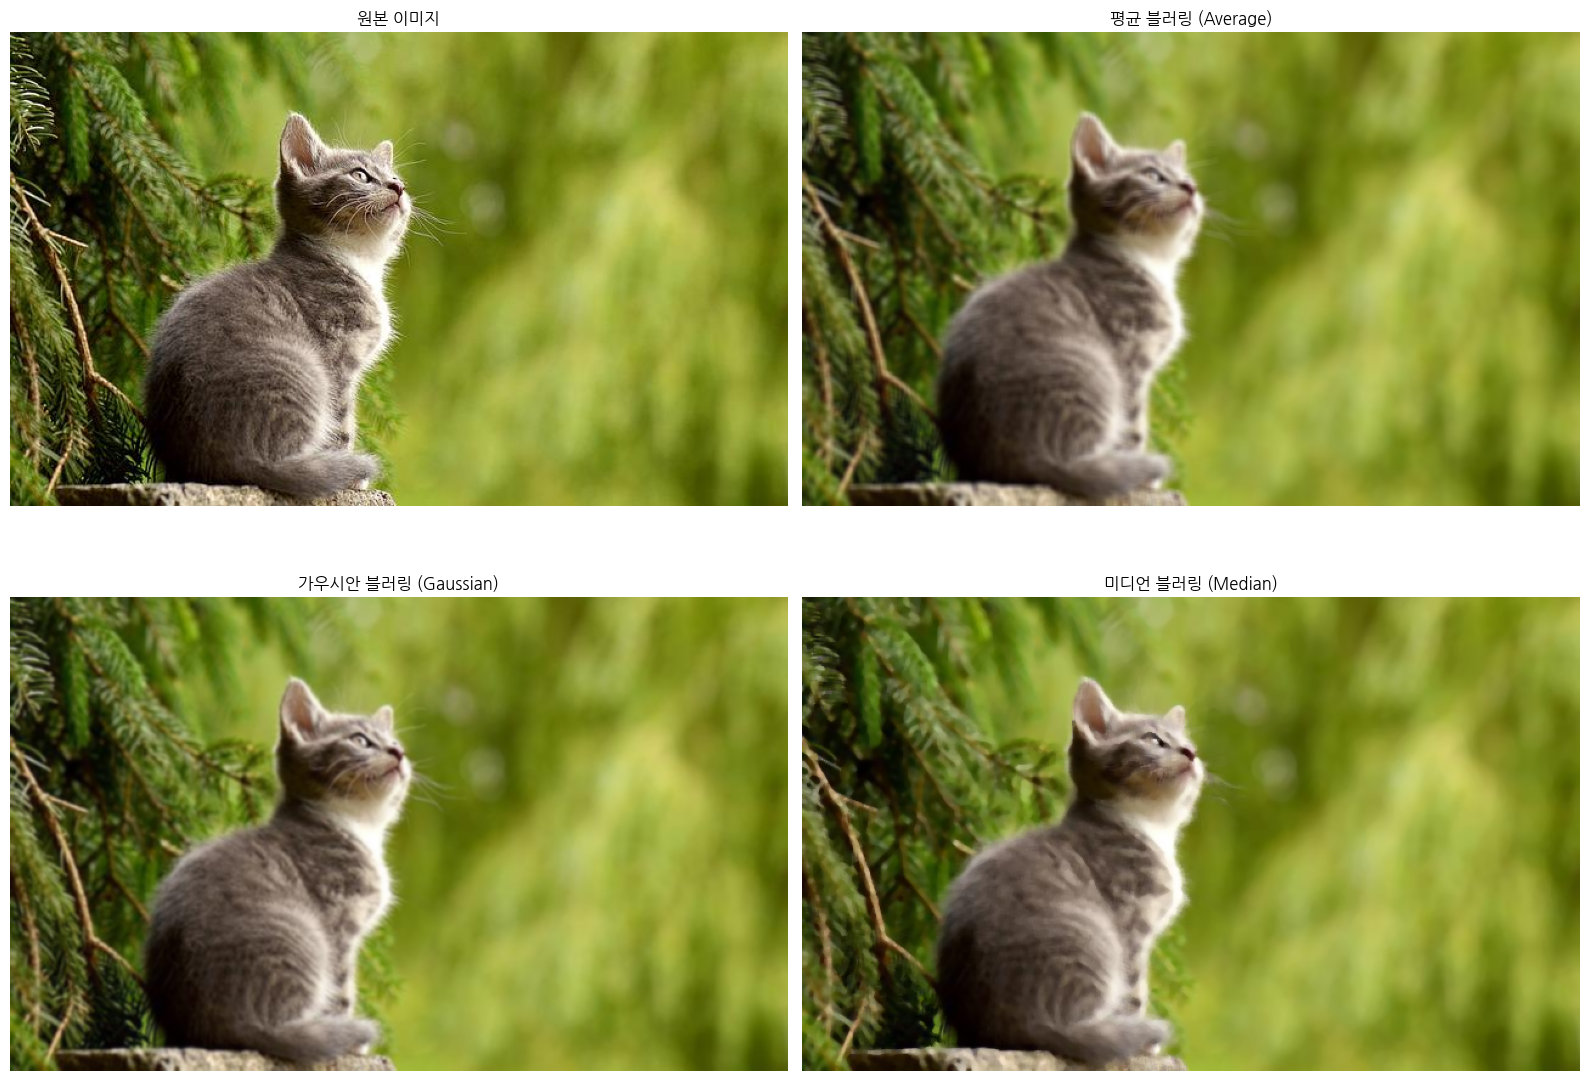

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 원본 이미지 불러오기
img = cv2.imread('../cv_images/img.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # matplotlib 출력용 RGB 변환

# 1. 평균 블러링 (Averaging Blur)
blur_avg = cv2.blur(img, (5, 5))  # (5x5) 커널로 평균

# 2. 가우시안 블러링 (Gaussian Blur)
blur_gaussian = cv2.GaussianBlur(img, (5, 5), 0)  # (5x5) 가우시안 커널, sigmaX=0

# 3. 미디언 블러링 (Median Blur)
blur_median = cv2.medianBlur(img, 5)  # 5x5 영역에서 중앙값(median)으로 대체

# 결과 이미지를 RGB로 변환 (matplotlib에 맞게)
blur_avg_rgb = cv2.cvtColor(blur_avg, cv2.COLOR_BGR2RGB)
blur_gaussian_rgb = cv2.cvtColor(blur_gaussian, cv2.COLOR_BGR2RGB)
blur_median_rgb = cv2.cvtColor(blur_median, cv2.COLOR_BGR2RGB)

# 이미지 시각화
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.title('원본 이미지')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('평균 블러링 (Average)')
plt.imshow(blur_avg_rgb)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('가우시안 블러링 (Gaussian)')
plt.imshow(blur_gaussian_rgb)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('미디언 블러링 (Median)')
plt.imshow(blur_median_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()
